In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = pd.ExcelFile("ds1.2022.xlsx")
file.sheet_names

['TableofContent',
 'Population',
 'Agricultural_Land_Use',
 'Agricultural_Production',
 'Industrial and Service Sector',
 'GDP_1270-1700',
 'GDP_1700-1870']

In [59]:
data = {}
for sheet_name in file.sheet_names:
    data[sheet_name] = pd.read_excel(file, sheet_name = sheet_name, parse_dates = True)
data

{'TableofContent':                                            Unnamed: 0
 0   For a summary overview of the methodology and ...
 1    Broadberry, Stephen, Bruce M.S. Campbell, Ale...
 2   http://www.cambridge.org/gb/academic/subjects/...
 3      When using this data, please cite this source.
 4                                                 NaN
 5                                  Sheet: Population 
 6   Tables 1.06 and 1.10: Population in millions (...
 7                                                 NaN
 8                       Sheet: Agricultural land use 
 9   Table 2.10: Total arable acreage and total sow...
 10                                                NaN
 11                    Sheet: Agricultural production 
 12               All tables are for England 1270-1870
 13  Table 3.06: Crop yields (bushels per acre): wh...
 14  Table 3.07: Total arable output (million bushe...
 15  Figure 3.03: Livestock numbers: Cattle, sheep,...
 16  Table 3.15: Total output of livestock prod

In [60]:
data['GDP_1270-1700'] = data['GDP_1270-1700'].set_index(["Year"])

data['GDP_1270-1700'] = data['GDP_1270-1700'].set_axis(data["GDP_1270-1700"].iloc[0],
                    axis=1, inplace=False).iloc[2:]
data['GDP_1270-1700'].index = data['GDP_1270-1700'].index.astype(int)
data['GDP_1270-1700']

nan,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator
Year,,,,,,,,,,,
1270,64.596764,28.151841,37.005158,40.581988,NaN,4.440546,NaN,17.789079,15.346818,16.687132,16.597583
1271,63.922771,27.382561,37.409915,40.160298,NaN,4.790300,NaN,20.684271,14.957209,17.621449,18.092876
1272,69.028877,27.722861,37.512954,41.66774,NaN,4.963715,NaN,23.480587,13.361422,14.348568,18.069606
1273,61.402833,26.856267,37.553549,39.302597,NaN,4.421184,NaN,19.67284,14.882535,15.667059,17.063149
1274,60.487579,26.98748,37.650892,39.156498,NaN,4.691772,NaN,21.950834,13.731647,16.910094,18.175017
...,...,...,...,...,...,...,...,...,...,...,...
1696,101.424439,92.861185,94.071804,95.534486,NaN,64.545032,NaN,111.5497,101.024621,96.795322,102.481255
1697,100.486028,91.213853,94.853147,94.853405,NaN,66.528233,NaN,114.972729,107.42597,97.886134,106.38854
1698,101.57417,95.469879,97.08571,97.61639,NaN,70.110125,NaN,126.330362,105.548258,98.818626,108.943113


In [61]:
data['GDP_1700-1870'].set_index("Year", inplace = True)
data['GDP_1700-1870'] = data['GDP_1700-1870'].set_axis(data['GDP_1700-1870'].iloc[0],
                    axis=1, inplace=False).iloc[2:]
data['GDP_1700-1870'].index = data['GDP_1700-1870'].index.astype(int)
data['GDP_1700-1870']

nan,Agriculture,Industry,Services,GDP,NaN,NaN,NaN,Agriculture,Industry,Services,GDP Deflator
Year,,,,,,,,,,,
1700,100,100,100,100,NaN,76.012520,NaN,100,100,100,100
1701,111.063495,111.862558,103.494472,108.972058,NaN,79.129635,NaN,88.546499,98.090638,98.05002,95.529803
1702,117.736323,101.112362,103.0234,106.16158,NaN,75.827471,NaN,86.996865,95.436059,97.885148,93.96672
1703,104.666207,92.644368,103.598023,99.358023,NaN,69.465726,NaN,80.142811,95.58553,97.19417,91.977693
1704,131.247698,117.019911,109.105115,118.285901,NaN,85.536548,NaN,87.75951,97.20737,98.608615,95.133529
...,...,...,...,...,...,...,...,...,...,...,...
1866,354.658519,1583.847992,997.969848,896.992051,NaN,896.974747,NaN,198.807533,70.422858,179.94445,131.554737
1867,359.015634,1583.778471,1009.968803,903.385868,NaN,883.103311,NaN,207.320807,63.255233,180.585799,128.60359
1868,386.469114,1667.022683,1053.107427,950.046384,NaN,911.587063,NaN,203.370203,61.466891,178.534199,126.231637


In [62]:
keys = ["Agriculture", "Industry", "Services", "GDP"]
merge_data = data['GDP_1270-1700'].T.iloc[:4].T#[keys]
merge_data = merge_data.append(data['GDP_1700-1870'].T.iloc[:4].T.loc["1701":"1870"], ignore_index = False)
merge_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_14872\702370683.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merge_data = merge_data.append(data['GDP_1700-1870'].T.iloc[:4].T.loc["1701":"1870"], ignore_index = False)


,Agriculture,Industry,Services,GDP
Year,,,,
1270,64.596764,28.151841,37.005158,40.581988
1271,63.922771,27.382561,37.409915,40.160298
1272,69.028877,27.722861,37.512954,41.66774
1273,61.402833,26.856267,37.553549,39.302597
1274,60.487579,26.98748,37.650892,39.156498
...,...,...,...,...
1866,354.658519,1583.847992,997.969848,896.992051
1867,359.015634,1583.778471,1009.968803,903.385868
1868,386.469114,1667.022683,1053.107427,950.046384


In [63]:
for key, val in merge_data.items():
    merge_data[key] = pd.to_numeric(val)
GDP = {}
GDP["Data"] = merge_data
GDP["Log"] = np.log(merge_data)
GDP["Rates"] = GDP["Log"].diff()
GDP["Rates"]


,Agriculture,Industry,Services,GDP
Year,,,,
1270,NaN,NaN,NaN,NaN
1271,-0.010489,-0.027706,0.010878,-0.010445
1272,0.076849,0.012351,0.002751,0.036848
1273,-0.117069,-0.031758,0.001082,-0.058437
1274,-0.015018,0.004874,0.002589,-0.003724
...,...,...,...,...
1866,-0.018529,0.041585,0.044539,0.033907
1867,0.012211,-0.000044,0.011952,0.007103
1868,0.073686,0.051226,0.041826,0.050361


In [64]:
GDPPC = {"Data":GDP["Data"].copy()}
pop = data["Population"].set_index("Year").rename(columns = {"Population of England, millions": "England",
                                                            "Population of Great Britain, millions":"Great Britain"})
GDPPC["Data"]

,Agriculture,Industry,Services,GDP
Year,,,,
1270,64.596764,28.151841,37.005158,40.581988
1271,63.922771,27.382561,37.409915,40.160298
1272,69.028877,27.722861,37.512954,41.667740
1273,61.402833,26.856267,37.553549,39.302597
1274,60.487579,26.987480,37.650892,39.156498
...,...,...,...,...
1866,354.658519,1583.847992,997.969848,896.992051
1867,359.015634,1583.778471,1009.968803,903.385868
1868,386.469114,1667.022683,1053.107427,950.046384


In [65]:
for key in GDPPC["Data"].keys():
    GDPPC["Data"][key].loc[:"1700"] = GDPPC["Data"][key].loc[:"1700"].div(pop["England"].loc[:"1700"].values)
    GDPPC["Data"][key].loc["1701":] = GDPPC["Data"].loc["1701":][key].div(pop["Great Britain"].loc["1701":].values)
    
GDPPC["Data"]

,Agriculture,Industry,Services,GDP
Year,,,,
1270,14.799129,6.449591,8.477888,9.297340
1271,14.621779,6.263523,8.557193,9.186320
1272,15.765026,6.331432,8.567323,9.516206
1273,14.001402,6.123909,8.563161,8.961988
1274,13.771097,6.144191,8.571910,8.914689
...,...,...,...,...
1866,14.402376,64.318700,40.526694,36.426073
1867,14.405571,63.549413,40.525191,36.248530
1868,15.321484,66.088752,41.750215,37.664383


In [66]:
GDPPC["Log"] = np.log(GDPPC["Data"])
GDPPC["Rates"] = GDPPC["Log"].diff()
GDPPC["Rates"]


,Agriculture,Industry,Services,GDP
Year,,,,
1270,NaN,NaN,NaN,NaN
1271,-0.012056,-0.029274,0.009311,-0.012013
1272,0.075282,0.010784,0.001183,0.035281
1273,-0.118636,-0.033326,-0.000486,-0.060004
1274,-0.016585,0.003306,0.001021,-0.005292
...,...,...,...,...
1866,-0.030581,0.029533,0.032486,0.021855
1867,0.000222,-0.012033,-0.000037,-0.004886
1868,0.061641,0.039181,0.029781,0.038316


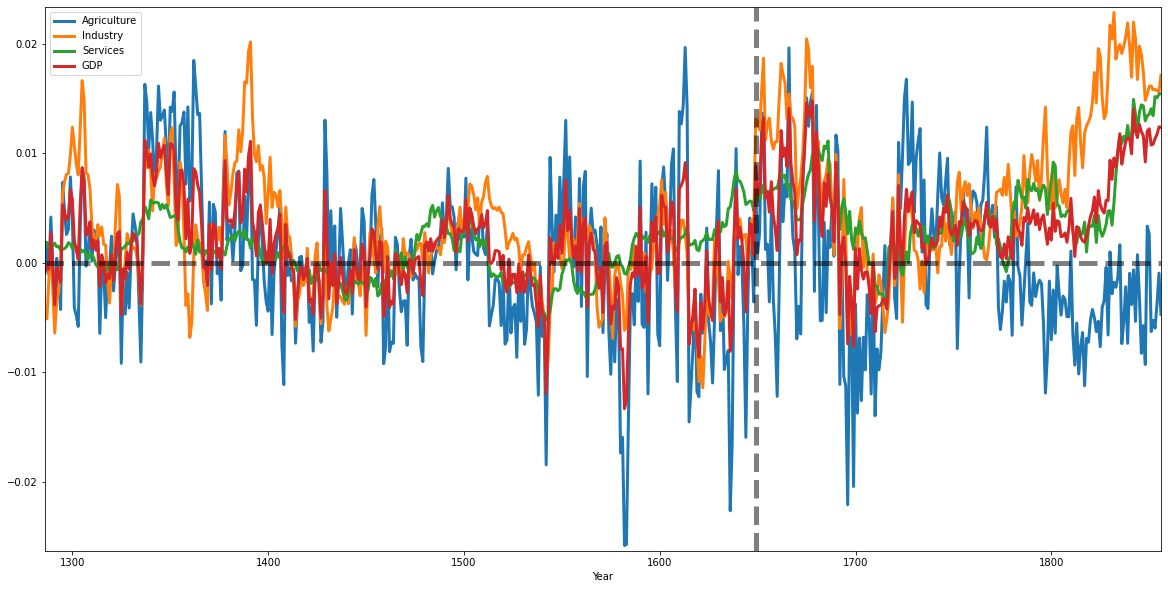

In [129]:
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams['axes.xmargin'] = 0.00
plot_df = GDPPC["Rates"]
# plot_df = plot_df[plot_df["GDP"] < plot_df["GDP"].quantile(.95)]
# plot_df = plot_df[GDPPC["Rates"]["GDP"] > GDPPC["Rates"]["GDP"].quantile(.05)]

fig, ax = plt.subplots(figsize = (20,10))
# plot_df.plot.line(ls = "", marker = "o", markersize = 2, ax = ax, legend = False)
plot_df.rolling(30, center = True).mean().plot.line(linewidth = 3, 
                                                           color = ["C" + str(i) for i in range(len(GDPPC["Rates"].keys()))],
                                                           ax = ax)

ax.axvline(1649, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)

<AxesSubplot:>

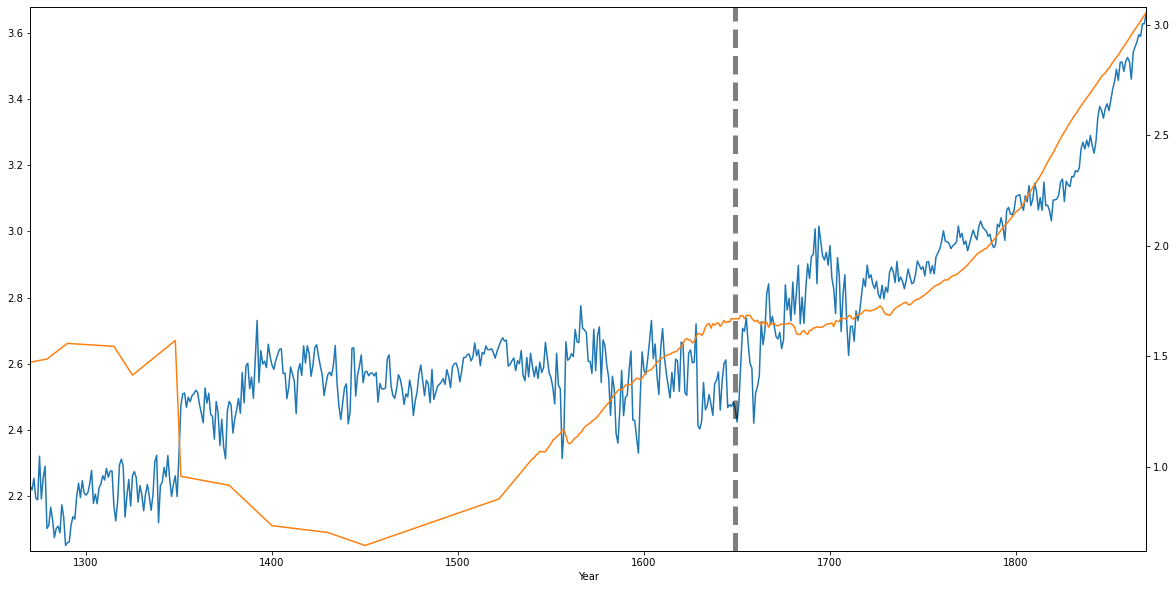

In [133]:
import datetime 
fig, ax = plt.subplots(figsize = (20,10))
GDPPC["Log"]["GDP"].plot.line(ax = ax)
ax.axvline(1649, ls = "--", linewidth = 5, color = "k", alpha = .5)
np.log(pop["England"]).plot.line(ax = ax, secondary_y = True)

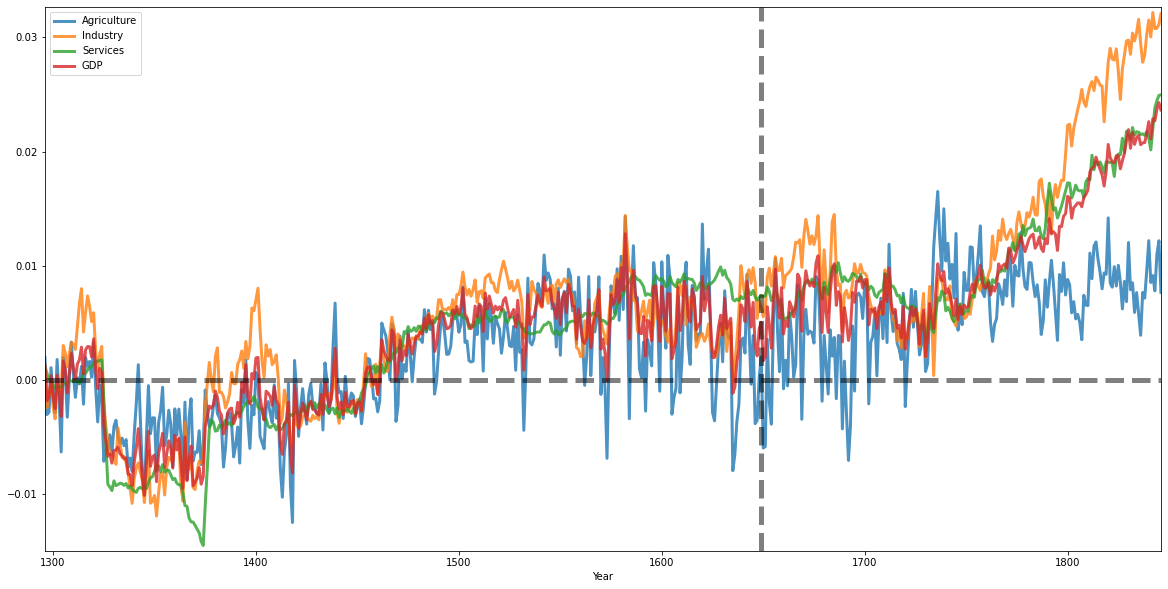

In [113]:
fig, ax = plt.subplots(figsize = (20,10))
GDP["Rates"].rolling(50, center = True).mean().plot.line(ax = ax, linewidth = 3, alpha = .8)
ax.axhline(0, ls = "--", linewidth = 5, color = "k", alpha = .5)
ax.axvline(1649, ls = "--", linewidth = 5, color = "k", alpha = .5)


<AxesSubplot:>

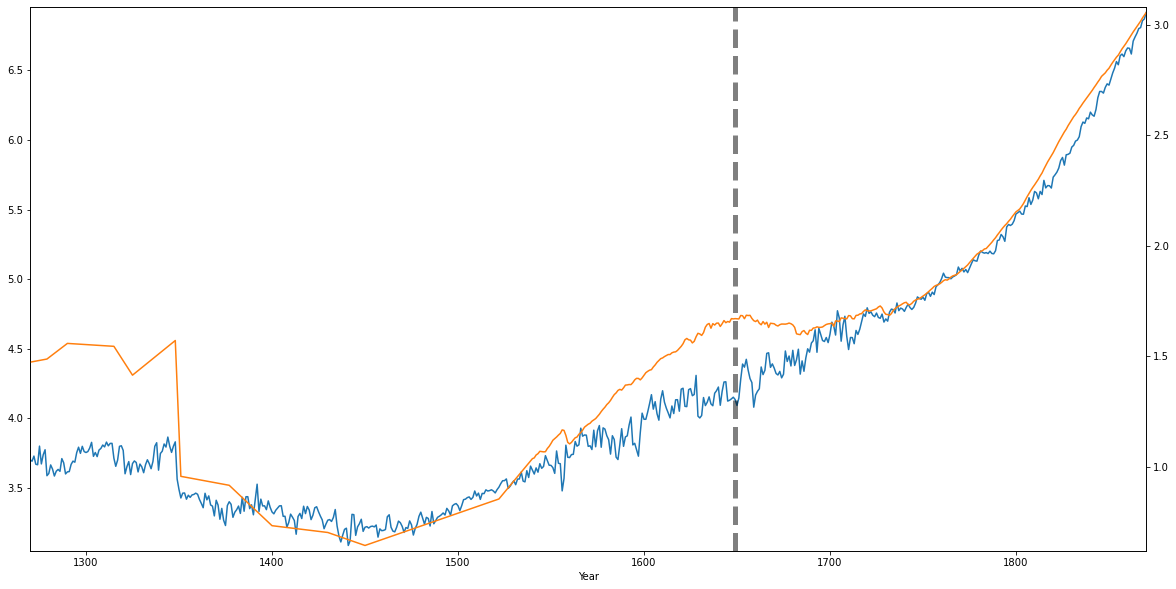

In [132]:
fig, ax = plt.subplots(figsize = (20,10))
GDP["Log"]["GDP"].plot.line(ax = ax)
ax.axvline(1649, ls = "--", linewidth = 5, color = "k", alpha = .5)
np.log(pop["England"]).plot.line(ax = ax, secondary_y = True)